In [1]:
import pandas as pd
import numpy as np

In [2]:
# df = pd.read_csv('/home/abrol/ARYAN_MT22019/CoughVid/public_dataset/metadata_compiled.csv')

In [3]:
# # df['date']=pd.to_datetime(row['date']).apply(lambda t: t.replace(minute=15*(t.minute//15)))
# #                 .dt.strftime('%H:%M')

# df['date'] = pd.to_datetime(df['datetime'])

In [4]:
# df['year'] = df['date'].dt.year
# df['month'] = df['date'].dt.month
# df['day'] = df['date'].dt.day
# df['day_of_week'] = df['date'].dt.day_of_week
# df['day_of_year'] = df['date'].dt.day_of_year

In [5]:
# def get_time_interval(hour):
#     if 5 <= hour < 12:
#         return 'Morning'
#     elif 12 <= hour < 16:
#         return 'Afternoon'
#     elif 16<= hour <20:
#         return 'Evening'
#     else: 
#         return 'Night'

# df['TimeOfDay'] = df['date'].dt.hour.apply(get_time_interval)


In [6]:
# def categorize_age(age):
#     if age < 18:
#         return 'Children'
#     elif 18 <= age < 60:
#         return 'Adults'
#     else:
#         return 'Seniors'

# # Create a new column "AgeGroup" based on the age categories
# df['AgeGroup'] = df['age'].apply(categorize_age)

In [7]:
# def season(date, latitude):
#     ''' date is a datetime object
#         hemisphere is either 'north' or 'south', dependent on long/lat.
#     '''
#     if latitude<=0:
#         hemisphere = 'south'
#     else: 
#         hemisphere = 'north'
#     md = date.month * 100 + date.day

#     if ((md > 320) and (md < 621)):
#         s = 0 #spring
#     elif ((md > 620) and (md < 923)):
#         s = 1 #summer
#     elif ((md > 922) and (md < 1223)):
#         s = 2 #fall
#     else:
#         s = 3 #winter

#     if hemisphere != 'north':
#         if s < 2:
#             s += 2 
#         else:
#             s -= 2

#     return s

# df["Season"] = -1
# for i in range(len(df)):
#     df['Season'][i]  = season(df['date'][i], df['latitude'][i])

# df["Season"].replace({0:"Spring",
#                       1:"Summer",
#                       2:"Fall",
#                       3:"winter"}, inplace=True )   

In [8]:
# df1 = df.drop(columns=['quality_1', 'cough_type_1', 'dyspnea_1', 'wheezing_1', 'stridor_1', 'choking_1', 'congestion_1', 'nothing_1', 'diagnosis_1', 'severity_1', 'quality_2', 'cough_type_2', 'dyspnea_2', 'wheezing_2', 'stridor_2', 'choking_2', 'congestion_2', 'nothing_2', 'diagnosis_2', 'severity_2', 'quality_3', 'dyspnea_3', 'wheezing_3', 'stridor_3', 'choking_3', 'congestion_3', 'nothing_3', 'cough_type_3', 'diagnosis_3', 'severity_3'])

In [9]:
df2 = pd.read_csv('/home/abrol/ARYAN_MT22019/CoughVid/features_status2.csv')

In [10]:
df2.rename(columns={'fname': 'uuid'}, inplace=True)

In [11]:
df2.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'uuid'  ], inplace=True) #cough_detected', 'status'

In [12]:
# final_df = pd.merge(df1, df2, on='uuid')

In [13]:
# sorted(final_df.isna().sum())


In [14]:
# final_df.describe()

In [15]:
# print(final_df.columns)
# final_df.drop(columns=['uuid','datetime','date'], inplace=True)


In [16]:
# x = final_df.columns.to_list()
# print(x)

In [17]:
df2.replace([np.inf, -np.inf], np.nan, inplace=True)
df2.dropna(inplace=True)

In [18]:
# df2.shape

(10823, 70)

In [19]:
from pycaret.classification import *

# Load your data (replace 'your_data.csv' with your file)


# Set up PyCaret with handling missing values
exp = setup(df2, target='status' ,session_id=69,preprocess=True, use_gpu=True)



[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA A100-SXM4-40GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet 

,Description,Value
0,Session id,69
1,Target,status
2,Target type,Multiclass
3,Target mapping,"COVID-19: 0, healthy: 1, symptomatic: 2"
4,Original data shape,"(10823, 70)"
5,Transformed data shape,"(10823, 70)"
6,Transformed train set shape,"(7576, 70)"
7,Transformed test set shape,"(3247, 70)"
8,Numeric features,69
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA A100-SXM4-40GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet 

In [23]:
best_model = compare_models(exclude=['lightgbm'], sort='recall')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:23:24
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7581,0.0000,0.7581,0.5746,0.6537,0.0000,0.0000,0.0490
dummy,Dummy Classifier,0.7581,0.5000,0.7581,0.5746,0.6537,0.0000,0.0000,0.0400
lr,Logistic Regression,0.7578,0.5426,0.7578,0.5747,0.6536,-0.0001,-0.0007,1.0600
et,Extra Trees Classifier,0.7570,0.5446,0.7570,0.6358,0.6550,0.0038,0.0180,0.5470
rf,Random Forest Classifier,0.7567,0.5447,0.7567,0.6162,0.6544,0.0023,0.0092,0.7050
lda,Linear Discriminant Analysis,0.7565,0.5658,0.7565,0.5976,0.6540,0.0021,0.0161,0.1140
ada,Ada Boost Classifier,0.7548,0.5412,0.7548,0.6034,0.6546,0.0053,0.0184,3.2870
gbc,Gradient Boosting Classifier,0.7536,0.5563,0.7536,0.5972,0.6541,0.0040,0.0097,47.3220
knn,K Neighbors Classifier,0.7196,0.4962,0.7196,0.6027,0.6459,-0.0052,-0.0072,0.5230
nb,Naive Bayes,0.6972,0.5307,0.6972,0.6181,0.6451,0.0110,0.0128,0.0480


In [24]:
best_model

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=69, solver='auto',
                tol=0.0001)

In [25]:
lr= create_model('lr')
tuned_lr= tune_model(lr)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7586,0.5521,0.7586,0.5754,0.6544,0.0000,0.0000
1,0.7586,0.5132,0.7586,0.5754,0.6544,0.0000,0.0000
2,0.7573,0.5419,0.7573,0.5752,0.6538,-0.0021,-0.0160
3,0.7573,0.5378,0.7573,0.5734,0.6527,0.0000,0.0000
4,0.7573,0.5184,0.7573,0.5734,0.6527,0.0000,0.0000
5,0.7559,0.5511,0.7559,0.5732,0.6520,-0.0021,-0.0161
6,0.7583,0.5499,0.7583,0.5750,0.6540,0.0000,0.0000
7,0.7583,0.5366,0.7583,0.5750,0.6540,0.0000,0.0000
8,0.7583,0.5643,0.7583,0.5750,0.6540,0.0000,0.0000


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7586,0.5520,0.7586,0.5754,0.6544,0.0000,0.0000
1,0.7586,0.5133,0.7586,0.5754,0.6544,0.0000,0.0000
2,0.7573,0.5419,0.7573,0.5752,0.6538,-0.0021,-0.0160
3,0.7573,0.5373,0.7573,0.5734,0.6527,0.0000,0.0000
4,0.7573,0.5184,0.7573,0.5734,0.6527,0.0000,0.0000
5,0.7573,0.5417,0.7573,0.5734,0.6527,0.0000,0.0000
6,0.7583,0.5499,0.7583,0.5750,0.6540,0.0000,0.0000
7,0.7583,0.5367,0.7583,0.5750,0.6540,0.0000,0.0000
8,0.7583,0.5643,0.7583,0.5750,0.6540,0.0000,0.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [26]:
rf= create_model('rf')
tuned_rf= tune_model(rf)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7573,0.5300,0.7573,0.5760,0.6543,0.0012,0.0063
1,0.7573,0.5444,0.7573,0.5752,0.6538,-0.0018,-0.0136
2,0.7573,0.5562,0.7573,0.5752,0.6538,-0.0021,-0.0160
3,0.7559,0.5479,0.7559,0.5740,0.6525,0.0011,0.0061
4,0.7559,0.5376,0.7559,0.6243,0.6544,0.0044,0.0193
5,0.7533,0.5726,0.7533,0.5735,0.6512,-0.0028,-0.0105
6,0.7583,0.5576,0.7583,0.5750,0.6540,0.0000,0.0000
7,0.7556,0.5290,0.7556,0.6968,0.6575,0.0091,0.0286
8,0.7609,0.5370,0.7609,0.8182,0.6602,0.0178,0.0949


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7586,0.5000,0.7586,0.5754,0.6544,0.0000,0.0000
1,0.7586,0.5000,0.7586,0.5754,0.6544,0.0000,0.0000
2,0.7586,0.5000,0.7586,0.5754,0.6544,0.0000,0.0000
3,0.7573,0.5000,0.7573,0.5734,0.6527,0.0000,0.0000
4,0.7573,0.5000,0.7573,0.5734,0.6527,0.0000,0.0000
5,0.7573,0.5000,0.7573,0.5734,0.6527,0.0000,0.0000
6,0.7583,0.5000,0.7583,0.5750,0.6540,0.0000,0.0000
7,0.7583,0.5000,0.7583,0.5750,0.6540,0.0000,0.0000
8,0.7583,0.5000,0.7583,0.5750,0.6540,0.0000,0.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [27]:
ada= create_model('ada')
tuned_ada= tune_model(ada)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7520,0.5593,0.7520,0.5907,0.6539,0.0012,0.0032
1,0.7546,0.5291,0.7546,0.5770,0.6540,0.0054,0.0169
2,0.7533,0.5281,0.7533,0.5752,0.6523,-0.0042,-0.0143
3,0.7493,0.5410,0.7493,0.5720,0.6488,-0.0113,-0.0355
4,0.7533,0.5472,0.7533,0.5735,0.6512,-0.0021,-0.0081
5,0.7573,0.5161,0.7573,0.5742,0.6531,0.0036,0.0272
6,0.7596,0.5473,0.7596,0.6834,0.6605,0.0226,0.0774
7,0.7583,0.5233,0.7583,0.6218,0.6569,0.0105,0.0460
8,0.7569,0.5492,0.7569,0.6535,0.6614,0.0249,0.0645


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7586,0.5000,0.7586,0.5754,0.6544,0.0000,0.0000
1,0.7586,0.5000,0.7586,0.5754,0.6544,0.0000,0.0000
2,0.7586,0.5000,0.7586,0.5754,0.6544,0.0000,0.0000
3,0.7573,0.5000,0.7573,0.5734,0.6527,0.0000,0.0000
4,0.7573,0.5000,0.7573,0.5734,0.6527,0.0000,0.0000
5,0.7573,0.5000,0.7573,0.5734,0.6527,0.0000,0.0000
6,0.7583,0.5000,0.7583,0.5750,0.6540,0.0000,0.0000
7,0.7583,0.5000,0.7583,0.5750,0.6540,0.0000,0.0000
8,0.7583,0.5000,0.7583,0.5750,0.6540,0.0000,0.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [28]:
blended_models = blend_models(estimator_list = [tuned_ada,tuned_lr,tuned_rf],optimize='recall', choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7586,0.5520,0.7586,0.5754,0.6544,0.0000,0.0000
1,0.7586,0.5133,0.7586,0.5754,0.6544,0.0000,0.0000
2,0.7586,0.5419,0.7586,0.5754,0.6544,0.0000,0.0000
3,0.7573,0.5373,0.7573,0.5734,0.6527,0.0000,0.0000
4,0.7573,0.5184,0.7573,0.5734,0.6527,0.0000,0.0000
5,0.7573,0.5417,0.7573,0.5734,0.6527,0.0000,0.0000
6,0.7583,0.5499,0.7583,0.5750,0.6540,0.0000,0.0000
7,0.7583,0.5367,0.7583,0.5750,0.6540,0.0000,0.0000
8,0.7583,0.5643,0.7583,0.5750,0.6540,0.0000,0.0000


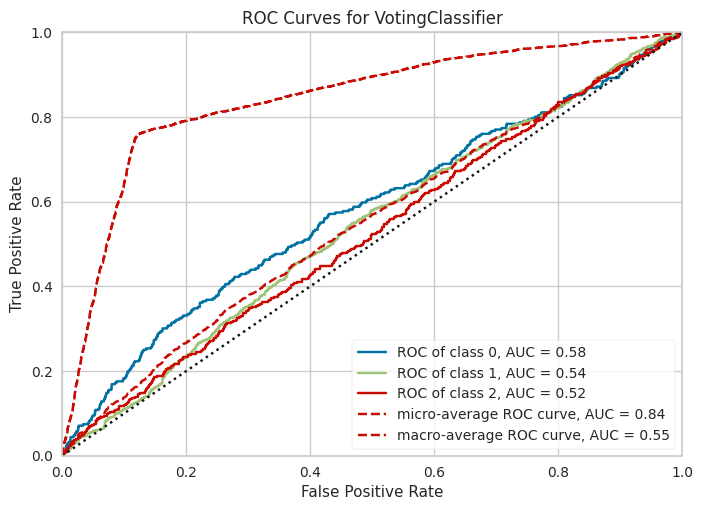

In [29]:
plot_model(blended_models, plot = 'auc')

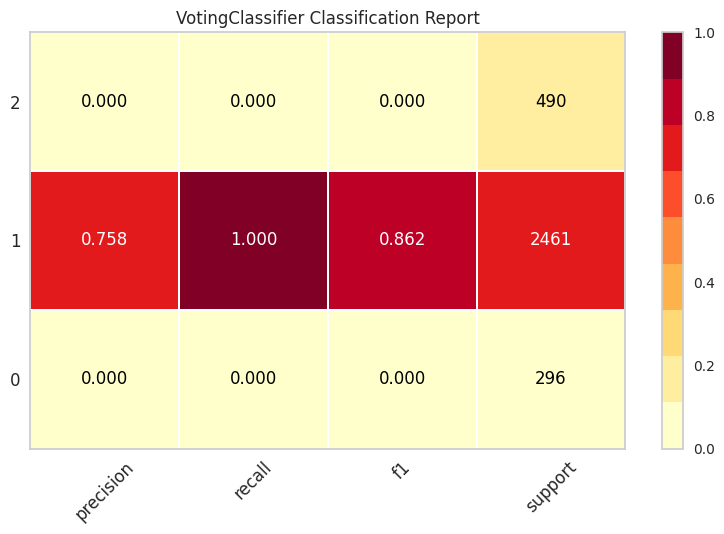

In [30]:
plot_model(blended_models, plot = 'class_report')

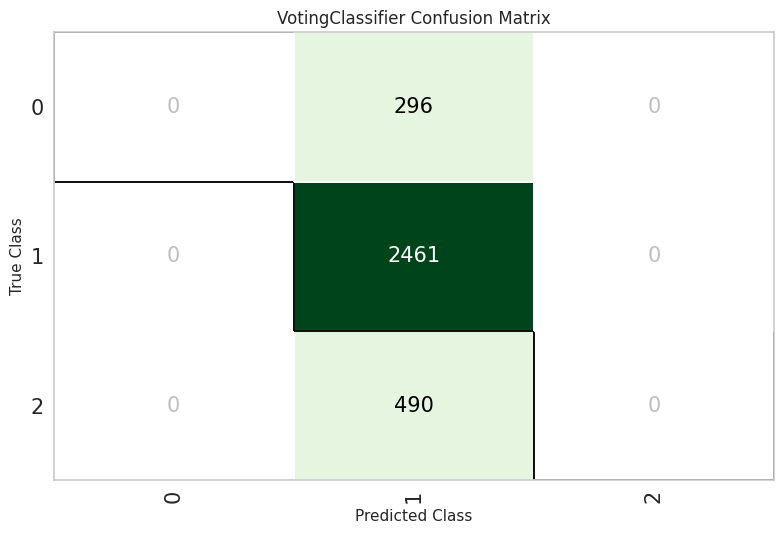

In [32]:
plot_model(blended_models, plot = 'confusion_matrix')

In [ ]:
# plot_model(tuned_dt, plot = 'tree')

In [31]:
stacker = stack_models(estimator_list = [tuned_ada,tuned_lr,tuned_rf],optimize='recall', choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7586,0.5521,0.7586,0.5754,0.6544,0.0000,0.0000
1,0.7586,0.5131,0.7586,0.5754,0.6544,0.0000,0.0000
2,0.7573,0.5419,0.7573,0.5752,0.6538,-0.0021,-0.0160
3,0.7573,0.5374,0.7573,0.5734,0.6527,0.0000,0.0000
4,0.7573,0.5184,0.7573,0.5734,0.6527,0.0000,0.0000
5,0.7559,0.5511,0.7559,0.5732,0.6520,-0.0021,-0.0161
6,0.7583,0.5499,0.7583,0.5750,0.6540,0.0000,0.0000
7,0.7583,0.5366,0.7583,0.5750,0.6540,0.0000,0.0000
8,0.7583,0.5643,0.7583,0.5750,0.6540,0.0000,0.0000


Original model was better than the stacked model, hence it will be returned. NOTE: The display metrics are for the stacked model (not the original one).


In [ ]:
plot_model(blended_models, plot = 'auc')

In [34]:
# plot_model(blended_models, plot = 'ks')

ValueError: Cannot calculate KS statistic for data with 3 category/ies

In [35]:
plot_model(blended_models, plot = 'confusion_matrix')

NameError: name 'tuned_dt' is not defined

In [ ]:
# 'List of available plots (ID - Name):

# ‘pipeline’ - Schematic drawing of the preprocessing pipeline

# ‘auc’ - Area Under the Curve

# ‘threshold’ - Discrimination Threshold

# ‘pr’ - Precision Recall Curve

# ‘confusion_matrix’ - Confusion Matrix

# ‘error’ - Class Prediction Error

# ‘class_report’ - Classification Report

# ‘boundary’ - Decision Boundary

# ‘rfe’ - Recursive Feature Selection

# ‘learning’ - Learning Curve

# ‘manifold’ - Manifold Learning

# ‘calibration’ - Calibration Curve

# ‘vc’ - Validation Curve

# ‘dimension’ - Dimension Learning

# ‘feature’ - Feature Importance

# ‘feature_all’ - Feature Importance (All)

# ‘parameter’ - Model Hyperparameter

# ‘lift’ - Lift Curve

# ‘gain’ - Gain Chart

# ‘tree’ - Decision Tree

# ‘ks’ - KS Statistic Plot'

In [ ]:
final_rf = finalize_model(tuned_dt)

In [ ]:
save_model(final_rf, 'saved_dt_model')

In [ ]:
from pycaret.classification import load_model
saved_dt = load_model('saved_dt_model')

In [ ]:
# pred_holdout = predict_model(saved_dt)
# pred_unseen = predict_model(saved_dt, data = pd.DataFrame())

In [ ]:
# dashboard(saved_dt)